# **Análise de retenção**


## **Descrição do problema**

#### Baseado nos dados da Pesquisa Etensiva do Desenvolvimento Educacional PEDE 2022, identificamos o termo "evasão" como a diferença entre o número de estudantes de uma dada idade em um ano, e o número de estudantes veteranos dessa mesma idade +1 ano no ano seguinte.

#### Segundo os elaboradores da pesquisa, os dados apresentados indicam que existe uma rotatividade na Associação, que se expressa por meio de uma taxa de evasão média de 28,5% entre 2020 e 2022. Abaixo, é possível ver o gráfico de frequência da evasão entre 2021 e 2022

## **Objetivo da Análise**

#### Fazer uma análise do perfil dos alunos que evadiram, entender características que potencialmente tem mais correlação com essa prática e identificar quais outros alunos podem evadir, para que a Passos Mágicos consiga direcionar ações mais específicas para reter por mais tempo esses alunos ao longo do tempo.

## **Ajuste da base**

#### Para essa análise, vamos ajustar a base para identificarmos no geral, qual feature tem maior importância, dada o churn ano a ano:



In [178]:
# Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [179]:
df = pd.read_csv('../data/raw/PEDE_PASSOS_DATASET_FIAP.csv', sep=';')

In [180]:
df.head()

,INSTITUICAO_ENSINO_ALUNO_2020,NOME,IDADE_ALUNO_2020,ANOS_PM_2020,FASE_TURMA_2020,PONTO_VIRADA_2020,INDE_2020,INDE_CONCEITO_2020,PEDRA_2020,DESTAQUE_IEG_2020,...,IPP_2022,REC_AVA_1_2022,REC_AVA_2_2022,REC_AVA_3_2022,REC_AVA_4_2022,INDICADO_BOLSA_2022,PONTO_VIRADA_2022,IPV_2022,IAN_2022,NIVEL_IDEAL_2022
0,Escola Pública,ALUNO-1,11,2,2H,Não,7.883752,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,ALUNO-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.625000,Mantido na Fase + Bolsa,Mantido na Fase atual,NaN,NaN,Sim,Não,7.916665,5.0,Fase 2 (5º e 6º ano)
2,Escola Pública,ALUNO-3,12,2,3H,Não,7.856389666666666,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Escola Pública,ALUNO-4,10,2,1D,Não,5.076252,D,Quartzo,Ponto a melhorar em 2021: Melhorar a sua entre...,...,6.250000,Promovido de Fase,Mantido na Fase atual,Promovido de Fase,NaN,Não,Não,8.055553,5.0,Fase 3 (7º e 8º ano)
4,Escola Pública,ALUNO-5,10,1,2M,Não,8.077085,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,...,6.458333,Mantido na Fase atual,Promovido de Fase,Mantido na Fase atual,NaN,Não,Não,7.833337,5.0,Fase 3 (7º e 8º ano)


## **ANÁLISE EXPLORATÓRIA**

#### A primeira forma de identificar os alunos que evadiram é entender quais features temos na base.

#### Verificamos que existem dois campos, "ponto_virada" que pode nos trazer essa informação, visto que existe durante os 3 anos de dados existentes.



### Identificando alunos que evadiram

In [181]:
indicacao_evasao = ['NOME', 'PONTO_VIRADA_2020', 'PONTO_VIRADA_2021', 'PONTO_VIRADA_2022']
df_evasao = df[indicacao_evasao]

df_evasao.head()

,NOME,PONTO_VIRADA_2020,PONTO_VIRADA_2021,PONTO_VIRADA_2022
0,ALUNO-1,Não,Não,NaN
1,ALUNO-2,NaN,NaN,Não
2,ALUNO-3,Não,Não,NaN
3,ALUNO-4,Não,NaN,Não
4,ALUNO-5,Não,Não,Não


In [182]:
# Verificando quais alunos evadiram
def verifica_evadidos(row):
    if pd.isna(row['PONTO_VIRADA_2022']):  # Se PONTO_VIRADA_2022 for NaN
        return True  # O aluno evadiu
    elif pd.isna(row['PONTO_VIRADA_2020']):  # Se PONTO_VIRADA_2020 for NaN
        return False  # O aluno não evadiu
    elif pd.isna(row['PONTO_VIRADA_2021']):  # Se PONTO_VIRADA_2021 for NaN
        return True  # O aluno evadiu
    else:
        return False  # O aluno não evadiu

In [183]:
df_evasao['EVADIU'] = df_evasao.apply(verifica_evadidos, axis=1)

df_evasao.head(20)

C:\Users\Pehls\AppData\Local\Temp\ipykernel_29020\3149641427.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_evasao['EVADIU'] = df_evasao.apply(verifica_evadidos, axis=1)


,NOME,PONTO_VIRADA_2020,PONTO_VIRADA_2021,PONTO_VIRADA_2022,EVADIU
0,ALUNO-1,Não,Não,NaN,True
1,ALUNO-2,NaN,NaN,Não,False
2,ALUNO-3,Não,Não,NaN,True
3,ALUNO-4,Não,NaN,Não,True
4,ALUNO-5,Não,Não,Não,False
5,ALUNO-6,NaN,NaN,Não,False
6,ALUNO-7,NaN,NaN,Não,False
7,ALUNO-8,Sim,Não,Não,False
8,ALUNO-9,NaN,NaN,Não,False
9,ALUNO-10,Não,NaN,NaN,True


In [184]:
# Função para identificar o último ano de ponto de virada antes de NaN
def ultimo_ano(row):
    if row['EVADIU']:  # Verifica se EVADIU é verdadeiro
        if row['PONTO_VIRADA_2020'] in ['Sim', 'Não'] and pd.isna(row['PONTO_VIRADA_2021']):
            return 2020
        elif row['PONTO_VIRADA_2021'] in ['Sim', 'Não'] and pd.isna(row['PONTO_VIRADA_2022']):
            return 2021
        elif row['PONTO_VIRADA_2022'] in ['Sim', 'Não']:
            return 2022
    return pd.NA

In [185]:
# Aplicar a função para cada linha do DataFrame
df_evasao['ULTIMO_ANO'] = df_evasao.apply(ultimo_ano, axis=1)

df_evasao.head(20)

C:\Users\Pehls\AppData\Local\Temp\ipykernel_29020\2470220789.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_evasao['ULTIMO_ANO'] = df_evasao.apply(ultimo_ano, axis=1)


,NOME,PONTO_VIRADA_2020,PONTO_VIRADA_2021,PONTO_VIRADA_2022,EVADIU,ULTIMO_ANO
0,ALUNO-1,Não,Não,NaN,True,2021
1,ALUNO-2,NaN,NaN,Não,False,<NA>
2,ALUNO-3,Não,Não,NaN,True,2021
3,ALUNO-4,Não,NaN,Não,True,2020
4,ALUNO-5,Não,Não,Não,False,<NA>
5,ALUNO-6,NaN,NaN,Não,False,<NA>
6,ALUNO-7,NaN,NaN,Não,False,<NA>
7,ALUNO-8,Sim,Não,Não,False,<NA>
8,ALUNO-9,NaN,NaN,Não,False,<NA>
9,ALUNO-10,Não,NaN,NaN,True,2020


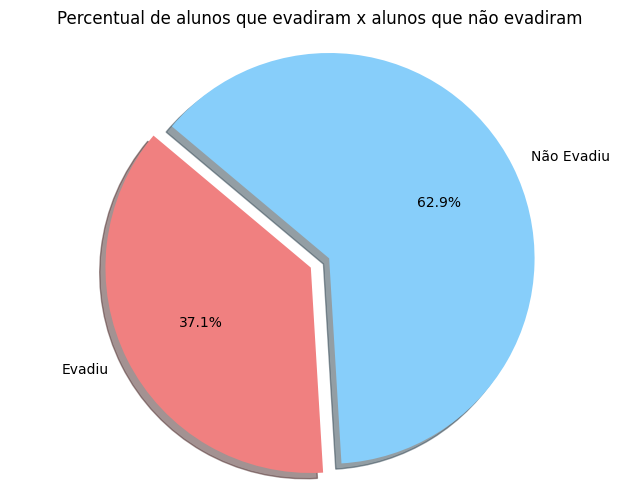

In [186]:
# Contando o número de alunos que evadiram e não evadiram
evadiu_count = df_evasao['EVADIU'].sum()
nao_evadiu_count = len(df_evasao) - evadiu_count

# Criando os rótulos e os valores para o gráfico de pizza
labels = ['Evadiu', 'Não Evadiu']
sizes = [evadiu_count, nao_evadiu_count]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # explode 1st slice

# Criando o gráfico de setores
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Percentual de alunos que evadiram x alunos que não evadiram')
plt.axis('equal')
plt.show()

### **Estudo sobre os alunos evadidos**

#### Agora que identificamos quais alunos evadiram, vamos agrupá-los e fazer uma análise exploratória

In [187]:
# Mesclar os DataFrames com base na coluna 'NOME'
df = df.merge(df_evasao[['NOME', 'EVADIU', 'ULTIMO_ANO']], on='NOME', how='left')

# Visualizar o DataFrame combinado
print(df)

     INSTITUICAO_ENSINO_ALUNO_2020        NOME IDADE_ALUNO_2020 ANOS_PM_2020  \
0                   Escola Pública     ALUNO-1               11            2   
1                              NaN     ALUNO-2              NaN          NaN   
2                   Escola Pública     ALUNO-3               12            2   
3                   Escola Pública     ALUNO-4               10            2   
4                   Escola Pública     ALUNO-5               10            1   
...                            ...         ...              ...          ...   
1344                           NaN  ALUNO-1345              NaN          NaN   
1345                           NaN  ALUNO-1346              NaN          NaN   
1346                Escola Pública  ALUNO-1347               17            1   
1347                Escola Pública  ALUNO-1348               13            2   
1348                           NaN  ALUNO-1349              NaN          NaN   

     FASE_TURMA_2020 PONTO_VIRADA_2020 

In [188]:
cols = ['INDE_2020',  'IAA_2020', 'IEG_2020', 'IPS_2020', 'IDA_2020', 'IPP_2020', 'IPV_2020', 'IAN_2020',
         'INDE_2021', 'IAA_2021', 'IEG_2021', 'IPS_2021', 'IDA_2021', 'IPP_2021', 'IPV_2021', 'IAN_2021',
         'INDE_2022', 'IAA_2022', 'IEG_2022', 'IPS_2022', 'IDA_2022', 'IPP_2022', 'IPV_2022', 'IAN_2022']
df.columns

Index(['INSTITUICAO_ENSINO_ALUNO_2020', 'NOME', 'IDADE_ALUNO_2020',
       'ANOS_PM_2020', 'FASE_TURMA_2020', 'PONTO_VIRADA_2020', 'INDE_2020',
       'INDE_CONCEITO_2020', 'PEDRA_2020', 'DESTAQUE_IEG_2020',
       'DESTAQUE_IDA_2020', 'DESTAQUE_IPV_2020', 'IAA_2020', 'IEG_2020',
       'IPS_2020', 'IDA_2020', 'IPP_2020', 'IPV_2020', 'IAN_2020', 'FASE_2021',
       'TURMA_2021', 'INSTITUICAO_ENSINO_ALUNO_2021',
       'SINALIZADOR_INGRESSANTE_2021', 'PEDRA_2021', 'INDE_2021', 'IAA_2021',
       'IEG_2021', 'IPS_2021', 'IDA_2021', 'IPP_2021', 'REC_EQUIPE_1_2021',
       'REC_EQUIPE_2_2021', 'REC_EQUIPE_3_2021', 'REC_EQUIPE_4_2021',
       'PONTO_VIRADA_2021', 'IPV_2021', 'IAN_2021', 'NIVEL_IDEAL_2021',
       'DEFASAGEM_2021', 'FASE_2022', 'TURMA_2022', 'ANO_INGRESSO_2022',
       'BOLSISTA_2022', 'INDE_2022', 'CG_2022', 'CF_2022', 'CT_2022',
       'PEDRA_2022', 'DESTAQUE_IEG_2022', 'DESTAQUE_IDA_2022',
       'DESTAQUE_IPV_2022', 'IAA_2022', 'IEG_2022', 'IPS_2022', 'IDA_2022',
       

In [189]:
# removendo linha problematica
df = df.loc[~(df['INDE_2020'] == 'D980')]

In [190]:
df.loc[(df['INDE_2021'] == '#NULO!'),['INDE_2021']] = np.nan

In [191]:
for col in cols:
    print('-='*20)
    print(col)
    df.loc[:, [col]] = df[col].astype(float)
    print(df.groupby('EVADIU')[col].describe())

-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
INDE_2020
        count  unique       top  freq
EVADIU                               
False   314.0   314.0  8.077085   1.0
True    413.0   413.0  7.883752   1.0
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
IAA_2020
        count  unique      top  freq
EVADIU                              
False   314.0    35.0  9.00002  71.0
True    413.0    35.0  9.00002  52.0
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
IEG_2020
        count  unique   top  freq
EVADIU                           
False   314.0    58.0  10.0  41.0
True    413.0    84.0  10.0  46.0
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
IPS_2020
        count  unique  top   freq
EVADIU                           
False   314.0    13.0  7.5  166.0
True    413.0    13.0  7.5  230.0
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
IDA_2020
        count  unique   top  freq
EVADIU                           
False   314.0    44.0  10.0  44.0
True    413.0    67.0   0.0  59.0
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=


In [192]:
from sklearn.preprocessing import MinMaxScaler
# normalizar
scaler = MinMaxScaler()

df = df[cols + ['EVADIU','ULTIMO_ANO','NOME']]
df[cols] = scaler.fit_transform(df[cols])

df = df.melt(id_vars=['EVADIU','ULTIMO_ANO','NOME'])

df['var_year'] = [x.split('_')[1] for x in df['variable']]
df['variable'] = [x.split('_')[0] for x in df['variable']]
df['EVADIU'] = [(str(getattr(x, 'ULTIMO_ANO')) == str(getattr(x, 'var_year'))) if not(getattr(x, 'ULTIMO_ANO') is pd.NA) else False for x in df.itertuples()]
df = df.drop(columns=['ULTIMO_ANO'])
df

,EVADIU,NOME,variable,value,var_year
0,False,ALUNO-1,INDE,0.724896,2020
1,False,ALUNO-2,INDE,NaN,2020
2,False,ALUNO-3,INDE,0.720780,2020
3,True,ALUNO-4,INDE,0.302557,2020
4,False,ALUNO-5,INDE,0.753980,2020
...,...,...,...,...,...
32347,False,ALUNO-1345,IAN,NaN,2022
32348,False,ALUNO-1346,IAN,0.333333,2022
32349,False,ALUNO-1347,IAN,NaN,2022
32350,False,ALUNO-1348,IAN,0.333333,2022


In [196]:
df = df.pivot_table(columns=['variable'], index=['EVADIU','var_year','NOME']).reset_index()

## análise das variáveis envolvidas

In [209]:
df.columns = ['EVADIU','YEAR','NOME','IAA','IAN','IDA','IEG','INDE','IPP','IPS','IPV']
cols = ['YEAR','IAA','IAN','IDA','IEG','INDE','IPP','IPS','IPV']

df

,EVADIU,YEAR,NOME,IAA,IAN,IDA,IEG,INDE,IPP,IPS,IPV
0,False,2020,ALUNO-1,0.850000,1.000000,0.700000,0.87,0.724896,0.593750,0.666667,0.774999
1,False,2020,ALUNO-100,0.900000,0.333333,0.750000,0.65,0.578162,0.687500,0.250000,0.791666
2,False,2020,ALUNO-1002,0.916666,0.333333,0.833333,0.94,0.759642,0.812500,0.666667,0.794444
3,False,2020,ALUNO-1004,0.900000,1.000000,0.900000,1.00,0.693494,0.250000,0.500000,0.549999
4,False,2020,ALUNO-1007,0.950000,1.000000,0.400000,0.83,0.671180,0.833333,0.666667,0.766666
...,...,...,...,...,...,...,...,...,...,...,...
2270,True,2021,ALUNO-973,0.630000,0.333333,0.284211,0.79,0.507618,0.690000,0.715909,0.680000
2271,True,2021,ALUNO-977,0.900000,0.333333,0.568421,0.71,0.553912,0.580000,0.852273,0.510000
2272,True,2021,ALUNO-986,0.880000,0.333333,0.663158,0.64,0.579988,0.830000,0.215909,0.750000
2273,True,2021,ALUNO-987,0.900000,1.000000,0.642105,0.83,0.805303,0.720000,0.852273,0.860000


# BorutaShap´
vamos tentar os shapley values:


In [210]:
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit
from sklearn.preprocessing import FunctionTransformer, StandardScaler, OneHotEncoder
from sklearn.feature_selection import SelectPercentile
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from BorutaShap import BorutaShap

In [211]:
_input_missings = SimpleImputer(strategy="median")
df.loc[:, cols] = pd.DataFrame(_input_missings.fit_transform(df.loc[:, cols]), columns=cols)
df = df.dropna(axis=0)

In [212]:
X_train, X_test, y_train, y_test = train_test_split(
       df[cols], df['EVADIU'], test_size=0.2, random_state=42, shuffle=False
    )

rf_estimator = GradientBoostingClassifier(random_state=42)

rf_feature_selection = BorutaShap(
    model=rf_estimator, importance_measure="shap", classification=False, pvalue=0.1
)

rf_feature_selection.fit(
    X=X_train,
    y=y_train,
    n_trials=50,
    sample=False,
    train_or_test="train",
    normalize=True,
    verbose=False,
)

boruta_accepted = rf_feature_selection.accepted

  0%|          | 0/50 [00:00<?, ?it/s]

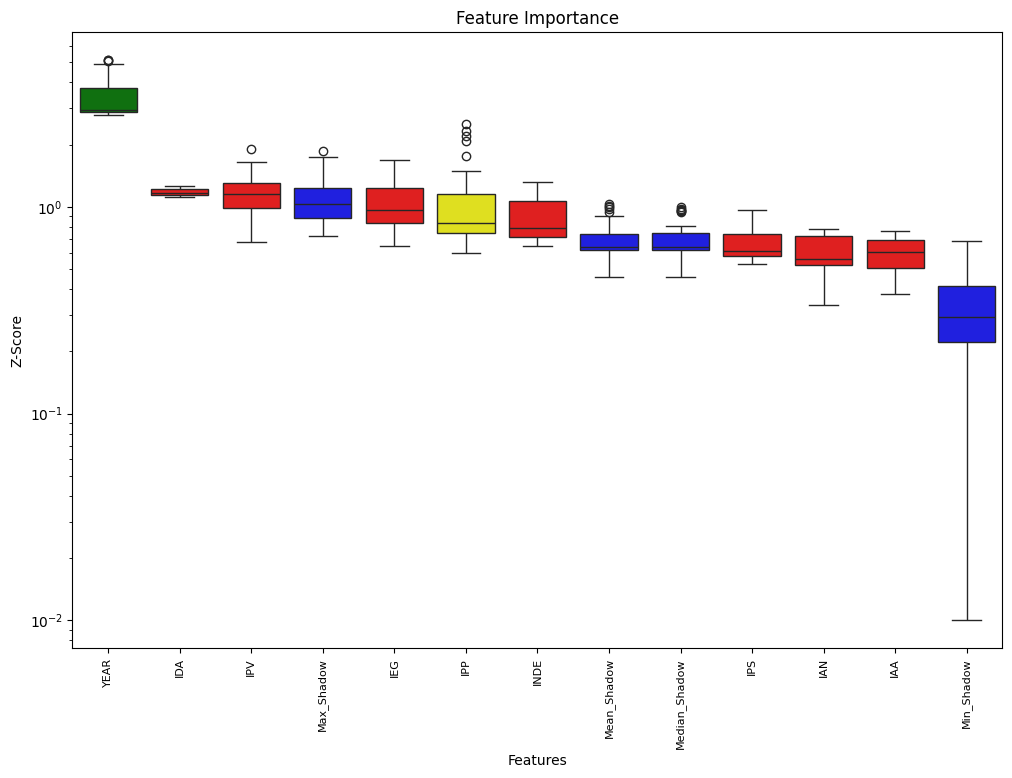

In [213]:
rf_feature_selection.plot(which_features='all')

In [214]:
# https://github.com/Ekeany/Boruta-Shap/blob/master/Examples/Classification.ipynb
rf_feature_selection.TentativeRoughFix()

0 tentative features are now accepted: []
1 tentative features are now rejected: ['IPP']


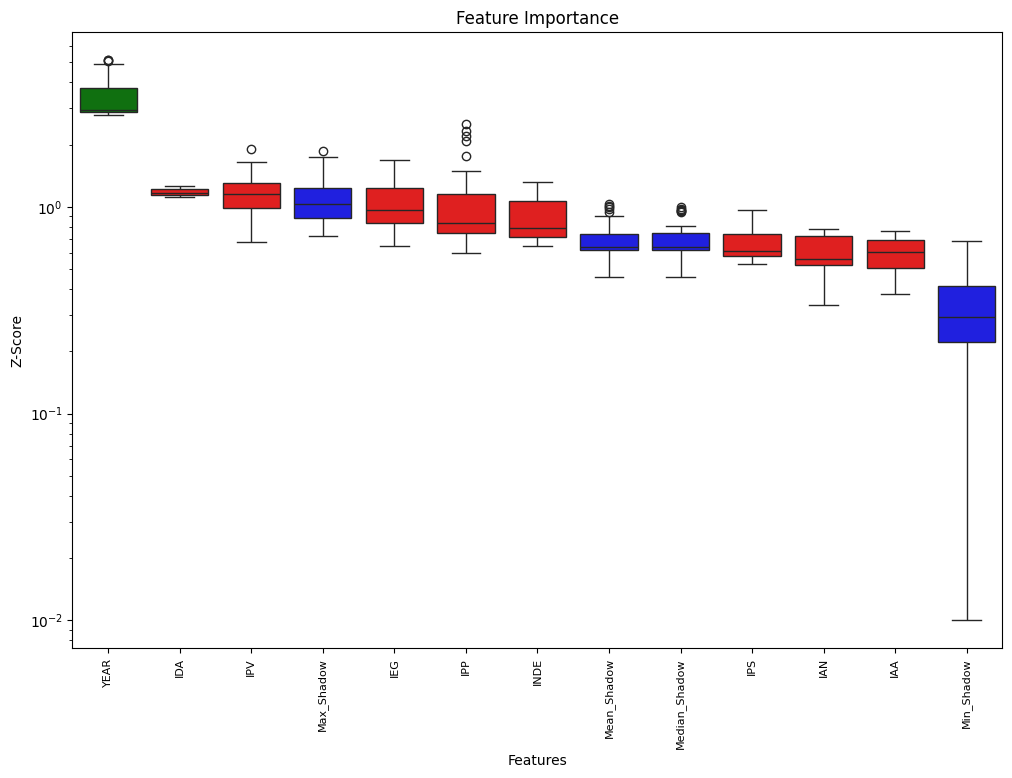

In [215]:
rf_feature_selection.plot(which_features='all')